In [1]:
# by Joh Schoeneberg, 08/2019


#5 frames
#cpu = 1, 21.132148265838623s
#cpu = 16

In [2]:
%matplotlib inline
import numpy as np
import skimage.external.tifffile
import os
import matplotlib.pyplot as plt
from PIL import Image

import multiprocessing  
from multiprocessing import Pool



import sys
sys.path.append('/Users/johannesschoeneberg/git/JohSchoeneberg/pyLattice/src/python/pylattice/functions')
import ParallelFunctions

In [3]:


inputFolder = '/Users/johannesschoeneberg/Desktop/PostDoc/Drubin_Betzig_Project/Janelia/Janelia_visit_2019-08-05_to_16/data/correct_deconvolution_artifacts/20190812_Imaging__Region_6/'
outputFolder = '/Users/johannesschoeneberg/Desktop/PostDoc/Drubin_Betzig_Project/Janelia/Janelia_visit_2019-08-05_to_16/data/correct_deconvolution_artifacts/20190812_Imaging__Region_6/output/'


In [34]:
# prepare the input data for the worker pool
center = np.array([700,330,110+45]) # x,y,z
margin = np.array([200,200,45])


parameters_for_workers = []
for file in os.listdir(inputFolder):
    if file.endswith(".tif"):
        parameters_for_workers.append((inputFolder,outputFolder,file,center,margin))
print(parameters_for_workers)

[('/Users/johannesschoeneberg/Desktop/PostDoc/Drubin_Betzig_Project/Janelia/Janelia_visit_2019-08-05_to_16/data/correct_deconvolution_artifacts/20190812_Imaging__Region_6/', '/Users/johannesschoeneberg/Desktop/PostDoc/Drubin_Betzig_Project/Janelia/Janelia_visit_2019-08-05_to_16/data/correct_deconvolution_artifacts/20190812_Imaging__Region_6/output/', 'Region_6_Iter_0000_CamA_ch0_CAM1_stack0000_488nm_0000000msec_0000163955msecAbs_000x_000y_000z_0000t_decon.tif', array([700, 330, 155]), array([200, 200,  45])), ('/Users/johannesschoeneberg/Desktop/PostDoc/Drubin_Betzig_Project/Janelia/Janelia_visit_2019-08-05_to_16/data/correct_deconvolution_artifacts/20190812_Imaging__Region_6/', '/Users/johannesschoeneberg/Desktop/PostDoc/Drubin_Betzig_Project/Janelia/Janelia_visit_2019-08-05_to_16/data/correct_deconvolution_artifacts/20190812_Imaging__Region_6/output/', 'Region_6_Iter_0001_CamA_ch0_CAM1_stack0000_488nm_0000000msec_0000296742msecAbs_000x_000y_000z_0001t_decon.tif', array([700, 330, 155

In [35]:
def openFile(inputFolder,outputFolder,file,center,margin):
    inputPath = os.path.join(inputFolder, file)

    latticeMovieStack = ParallelFunctions.open3dTiff(inputPath)
    #print(latticeMovieStack.shape)

    #latticeMovieStack_processed = cropLatticeFrame_core(latticeMovieStack,center, margin)
#
    ##output_folder = Path(outputFolder)
    #outputPath = os.path.join(outputFolder, file)
    ##print(outputPath)
    #skimage.external.tifffile.imsave(outputPath,latticeMovieStack_processed.astype('uint16'))

    return latticeMovieStack

In [36]:
parameters_for_workers[0][0]

'/Users/johannesschoeneberg/Desktop/PostDoc/Drubin_Betzig_Project/Janelia/Janelia_visit_2019-08-05_to_16/data/correct_deconvolution_artifacts/20190812_Imaging__Region_6/'

In [37]:
stack = openFile(parameters_for_workers[0][0],parameters_for_workers[0][1],parameters_for_workers[0][2],parameters_for_workers[0][3],parameters_for_workers[0][4])

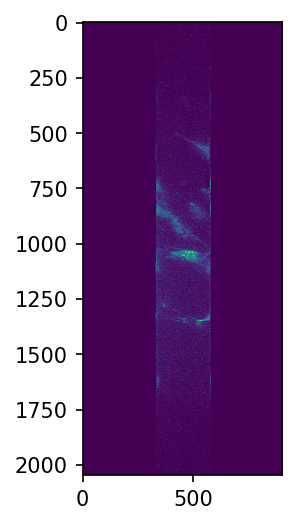

In [48]:
sliceIndex = 100

plt.figure(dpi=150)
plt.imshow(stack[sliceIndex])

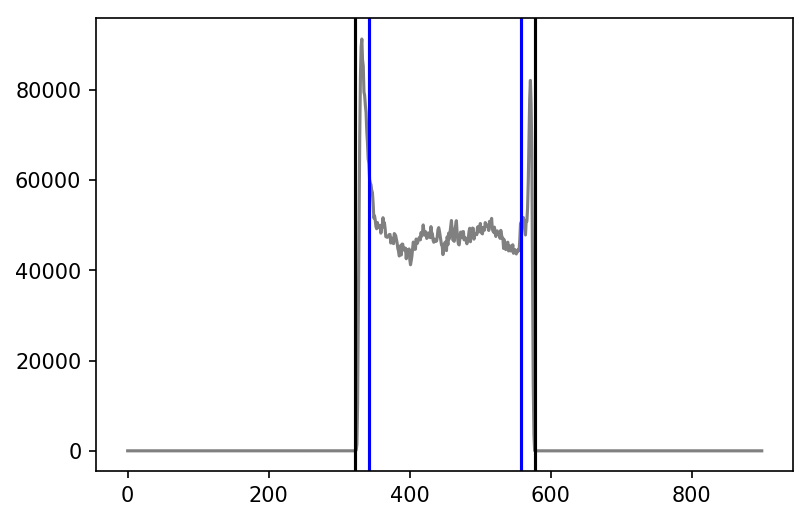

In [54]:
# doesn't work for -1
# doesn't work for 0

# crop these two ones out!

#margin

margin = 20

oneSlice = stack[sliceIndex]


summed = np.sum(oneSlice,axis=0)
all_zero = np.where(summed==0)[0]
all_nonZero = np.where(summed!=0)[0]

middle = np.average(np.where(summed!=0))
leftBoundary = np.max(all_zero[all_zero<middle])
rightBoundary = np.min(all_zero[all_zero>middle])


plt.figure(dpi=150)
plt.plot(summed,color='grey')
#plt.axvline(middle,color='red')
plt.axvline(leftBoundary, color='black')
plt.axvline(rightBoundary, color='black')

plt.axvline(leftBoundary+margin, color='blue')
plt.axvline(rightBoundary-margin, color='blue')

In [40]:
print(leftBoundary)
print(rightBoundary)


1
258


(2048, 900)
578


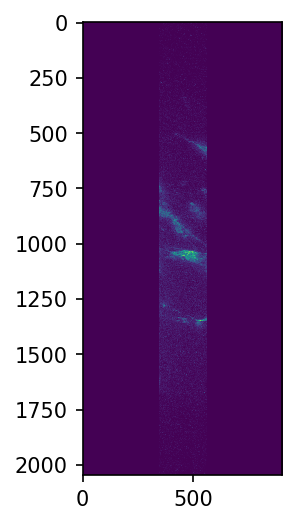

In [51]:
correctedSlice = np.copy(stack[sliceIndex])

print(correctedSlice.shape)

correctedSlice[:,0:leftBoundary+margin]=0
correctedSlice[:,rightBoundary-margin:correctedSlice.shape[1]]=0
print(rightBoundary)


plt.figure(dpi=150)
plt.imshow(correctedSlice)

In [25]:
# run the jobs on parallel processors

print("Number of cpu : ", multiprocessing.cpu_count())

import time
start_time = time.time()


if __name__ == '__main__':
    nCPU = multiprocessing.cpu_count()
    numberOfCPUsUsed = int(nCPU*0.75) #10
    print("Run on {} CPUs".format(numberOfCPUsUsed))
    pool = Pool(numberOfCPUsUsed)
    results = pool.starmap(ParallelFunctions.cropLatticeFrame, parameters_for_workers)
    
print(results)

elapsed_time = time.time() - start_time
print("elapsed time {}s".format(elapsed_time))

Number of cpu :  16
Run on 12 CPUs
['/Volumes/4TB_SSD/Johannes_Schoeneberg_Berkeley/20190814_Imaging/rotated/Region_4/CPPdecon/001x_000y_002z/chimeraX_cropped/Scan_Iter_0000_CamA_ch0_CAM1_stack0000_488nm_0000000msec_0000337547msecAbs_001x_000y_002z_0000t_decon.tif', '/Volumes/4TB_SSD/Johannes_Schoeneberg_Berkeley/20190814_Imaging/rotated/Region_4/CPPdecon/001x_000y_002z/chimeraX_cropped/Scan_Iter_0001_CamA_ch0_CAM1_stack0000_488nm_0000000msec_0000453193msecAbs_001x_000y_002z_0001t_decon.tif', '/Volumes/4TB_SSD/Johannes_Schoeneberg_Berkeley/20190814_Imaging/rotated/Region_4/CPPdecon/001x_000y_002z/chimeraX_cropped/Scan_Iter_0002_CamA_ch0_CAM1_stack0000_488nm_0000000msec_0000573205msecAbs_001x_000y_002z_0002t_decon.tif', '/Volumes/4TB_SSD/Johannes_Schoeneberg_Berkeley/20190814_Imaging/rotated/Region_4/CPPdecon/001x_000y_002z/chimeraX_cropped/Scan_Iter_0003_CamA_ch0_CAM1_stack0000_488nm_0000000msec_0000690085msecAbs_001x_000y_002z_0003t_decon.tif', '/Volumes/4TB_SSD/Johannes_Schoeneberg_B

In [28]:
#rename output files just by their
# e.g. 
# make Scan_Iter_0046_CamA_ch0_CAM1_stack0000_488nm_0000000msec_0005849968msecAbs_001x_000y_002z_0046t_decon.tif'
# to 0046.tif
for file in os.listdir(outputFolder):
    if file.endswith(".tif"):
        newFilename = outputFolder+"/"+file.split("_")[2]+".tif"
        os.rename(os.path.join(outputFolder, file), os.path.join(outputFolder, newFilename)) 
        print(newFilename)
        
            #print(file.split("_")[2])
            


/Volumes/4TB_SSD/Johannes_Schoeneberg_Berkeley/20190814_Imaging/rotated/Region_4/CPPdecon/001x_000y_002z/chimeraX_cropped//0000.tif
/Volumes/4TB_SSD/Johannes_Schoeneberg_Berkeley/20190814_Imaging/rotated/Region_4/CPPdecon/001x_000y_002z/chimeraX_cropped//0014.tif
/Volumes/4TB_SSD/Johannes_Schoeneberg_Berkeley/20190814_Imaging/rotated/Region_4/CPPdecon/001x_000y_002z/chimeraX_cropped//0022.tif
/Volumes/4TB_SSD/Johannes_Schoeneberg_Berkeley/20190814_Imaging/rotated/Region_4/CPPdecon/001x_000y_002z/chimeraX_cropped//0004.tif
/Volumes/4TB_SSD/Johannes_Schoeneberg_Berkeley/20190814_Imaging/rotated/Region_4/CPPdecon/001x_000y_002z/chimeraX_cropped//0018.tif
/Volumes/4TB_SSD/Johannes_Schoeneberg_Berkeley/20190814_Imaging/rotated/Region_4/CPPdecon/001x_000y_002z/chimeraX_cropped//0020.tif
/Volumes/4TB_SSD/Johannes_Schoeneberg_Berkeley/20190814_Imaging/rotated/Region_4/CPPdecon/001x_000y_002z/chimeraX_cropped//0002.tif
/Volumes/4TB_SSD/Johannes_Schoeneberg_Berkeley/20190814_Imaging/rotated/Regi

In [31]:
chimeraX_command_open = "open " + outputFolder+ "*.tif"
chimeraX_command_volume = "volume voxelSize 0.108,0.108,0.4"
print(chimeraX_command_open)
print(chimeraX_command_volume)

open /Volumes/4TB_SSD/Johannes_Schoeneberg_Berkeley/20190814_Imaging/rotated/Region_4/CPPdecon/001x_000y_002z/chimeraX_cropped/*.tif
volume voxelSize 0.108,0.108,0.4
